<a href="https://colab.research.google.com/github/Jakkaton/Project/blob/main/Project_Predicting_Heart_Disease_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting Heart Disease using Machine Learning

### Problem
This project will be exploring a binary classification because we're going to be using a number of different features about a person to predict whether they have heart disease or not

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?



### Data
The original data came from [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/45/heart+disease). But in this project we've used a data from [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset).

### Goal
If we can reach 90% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursuse this project.

### Heart Disease Data Dictionary
A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

age - age in years

1.  age - age in years
2.  sex - (1 = male; 0 = female)
3.  cp - chest pain type
      -  0: Typical angina: chest pain related decrease blood supply to the heart
      - 1: Atypical angina: chest pain not related to heart
      - 2: Non-anginal pain: typically esophageal spasms (non heart related)
      - 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
  - anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    - looks at stress of heart during excercise
    - unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
13. thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Preparing the tools
The libraries we're going to be using **Numpy, Pandas, Matplotlib, seaborn, Scikit-learn.**

In [ ]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### Load data


In [ ]:
df = pd.read_csv("/content/heart-disease.csv")
df.shape

(303, 14)

### Data Exploration (Exploratory data analysis or EDA)

This is a Simply check list for EDA since EDA has no real set methodology.


1.   What question(s) are you trying to solve (or prove wrong)?
2.   What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?



In [ ]:
# Check the first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
# Nomalized value counts
round(df.target.value_counts(normalize=True)*100,2)

1    54.46
0    45.54
Name: target, dtype: float64

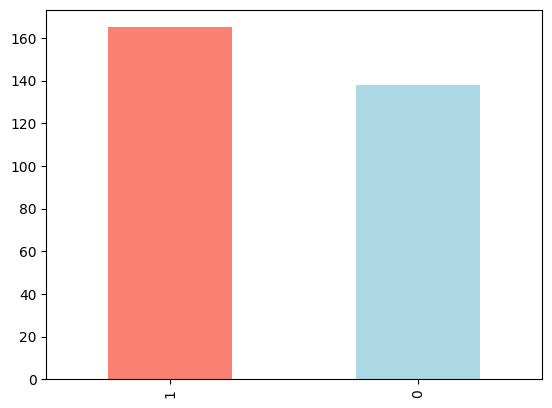

In [ ]:
# Plot the value counts with a bar graph
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**NOTED** : target column, 1 = heart disease persent, 0 = no heart disease. And for sex, 1 = male, 0 = female.

In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


### Making a crosstab visual

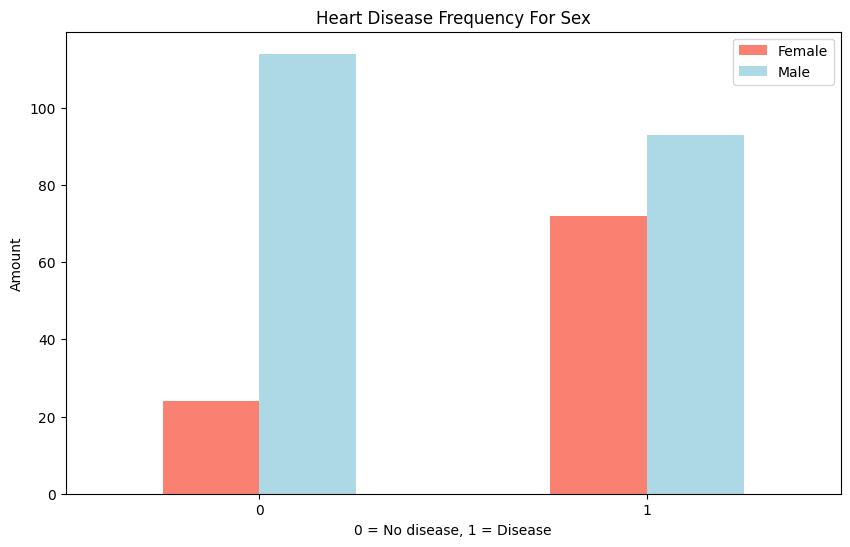

In [ ]:
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"])

# Add more attributes to it
plt.title("Heart Disease Frequency For Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

###Age vs Max Heart rate for Heart Disease

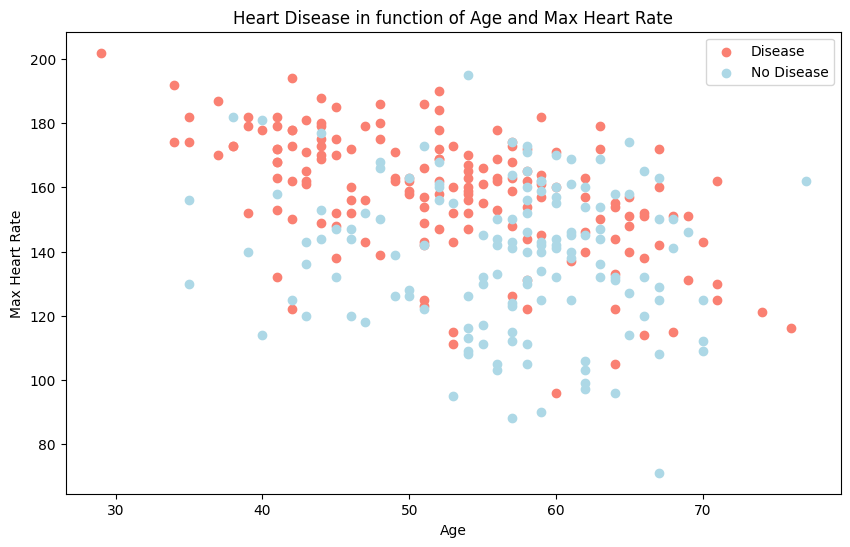

In [ ]:
# Create another figure
plt.figure(figsize=(10,6))

# Positive examples (heart disease)
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c = "salmon")

# Negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c= "lightblue")

# Add some info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

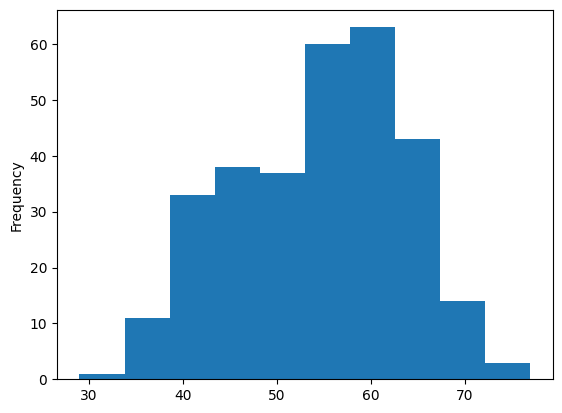

In [ ]:
df.age.plot.hist();

### Heart disaese Frequency per Chest Pain Type

In [ ]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


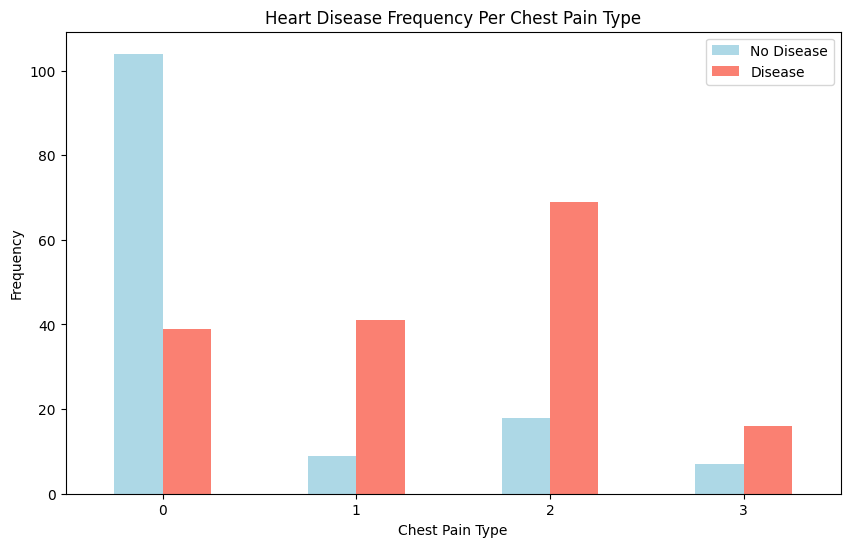

In [ ]:
# Create a new crosstab plot
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize = (10,6),
                                   color= ["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

### Correlation between independent variables

In [ ]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


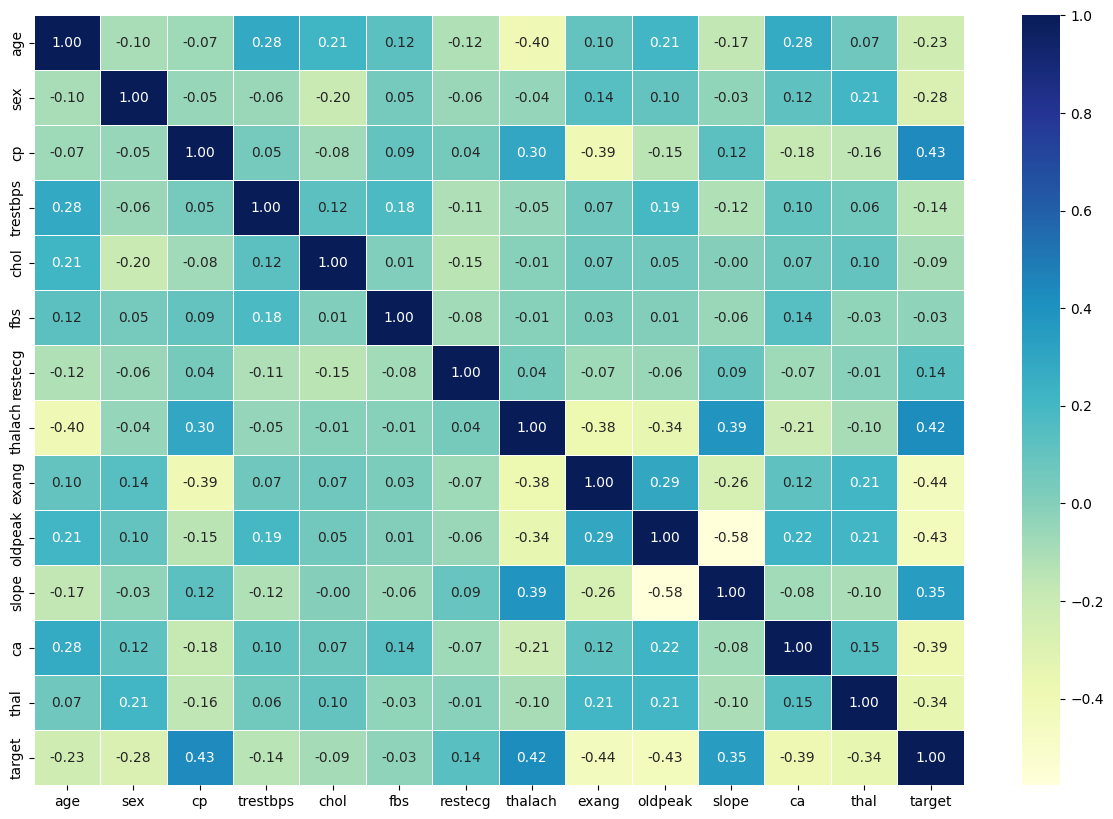

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot = True,
            linewidths = 0.5,
            fmt = ".2f",
            cmap = "YlGnBu");

### Exploratory Data Analysis (EDA) Conclusion

After loading and inspecting the data and dataset's features, the information i've got **there is 303 rows, 14 columns**. I discovered the proportion of people with heart disease is about 54.46% and the proportion of people without heart disease is 45.54%. When I **compared a target attribute and sex attribute**, there are 96 women, 207 males and there are 75.00 % of women, 44.92 % of males have heart diesase respectively.  Next step, I **comared age attribute and max heart rate attribute (thalach)**, I got the greatest range of people who have heart disease is around 40 to 60 years old and younger people who have heart disease got a high heart rate. the last comparing, I **compared a heart disease frequency per chest pain type**, I found the chest pain **type 1 Atypical angina isn't related to heart** but it seems higher ratio of participants with heart disease than not. Created a heatmap of all the features, and I found that none of the features are strongly corrected with each ohter in positive pr negative direction.

### Modeling

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Split the data
X = df.drop("target", axis = 1)
y = df.target.values

In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Set a random seed
np.random.seed(41)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2


In [ ]:
y_train, len(y_train)

(array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1]),
 242)

In [ ]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3


In [ ]:
y_test, len(y_test)

(array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0]),
 61)

In [ ]:
# Put models in a dictionary
models = {"KNN" : KNeighborsClassifier(),
          "Logistic Regression" : LogisticRegression(),
          "Random Forest" : RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  Fits and evaluates given machine learning models.
  models : a dict od different Scikit-Learn machine learning models
  X_train : training data
  X_test : testing data
  y_train : labels assosciated with training data
  y_test : labels assosciated with test data
  """

  # Random seed for reproducible results
  np.random.seed(41)
  # Make a list to keep model scores
  model_scores = {}
  # Loop through models
  for name, model in models.items():
    # Fit the model to the data
    model.fit(X_train, y_train)
    # Evaluate the model and append its score to model scores
    model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.7049180327868853,
 'Logistic Regression': 0.7868852459016393,
 'Random Forest': 0.8032786885245902}

### Model Comparison

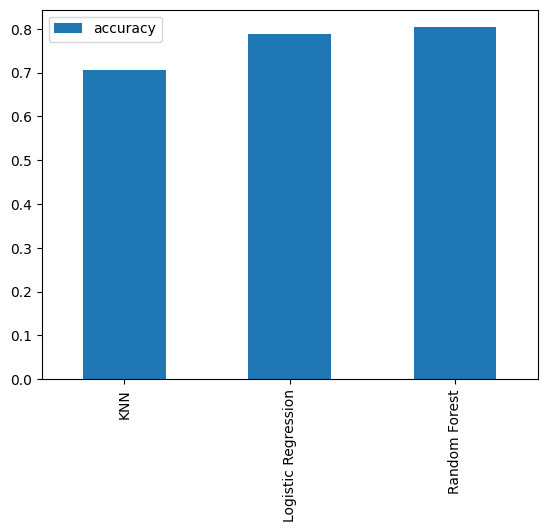

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

### Tune KNeighborsClassifier (K-Nearest Neibors or KNN) by hand

In [ ]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values of n_neighbors
neighbors = range(1,21)

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
  knn.set_params(n_neighbors = i)

  # Fit the algorithm
  knn.fit(X_train, y_train)

  # Update the training scores
  train_scores.append(knn.score(X_train, y_train))

  # Update the test scores
  test_scores.append(knn.score(X_test, y_test))

In [ ]:
train_scores

[1.0,
 0.7892561983471075,
 0.7727272727272727,
 0.7644628099173554,
 0.7520661157024794,
 0.7603305785123967,
 0.7355371900826446,
 0.7272727272727273,
 0.7396694214876033,
 0.7066115702479339,
 0.71900826446281,
 0.7024793388429752,
 0.6983471074380165,
 0.6942148760330579,
 0.6818181818181818,
 0.6942148760330579,
 0.6818181818181818,
 0.6735537190082644,
 0.6942148760330579,
 0.6776859504132231]

Maximum KNN score on the test data : 75.41%


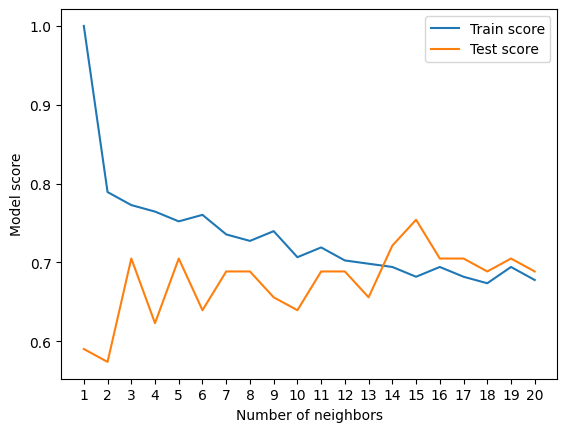

In [ ]:
# Plot a train scores
plt.plot(neighbors, train_scores, label = "Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data : {max(test_scores)*100:.2f}%")

### Tuning models with `RandomizedSearchCV`

In [ ]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:
# Setup random seed
np.random.seed(41)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [ ]:
rs_log_reg.score(X_test, y_test)

0.7868852459016393

In [ ]:
# Setup random seed
np.random.seed(41)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 410,
 'min_samples_split': 16,
 'min_samples_leaf': 7,
 'max_depth': 3}

In [ ]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8032786885245902

### Tuning a model with `GridSearchCV`

In [ ]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for logisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
# Check the best param
gs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [ ]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.7868852459016393

### Evaluating a model

In [ ]:
# Make a prediction on a test data
y_preds = gs_log_reg.predict(X_test)

In [ ]:
y_preds

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

### ROC Curve and AUC Scores

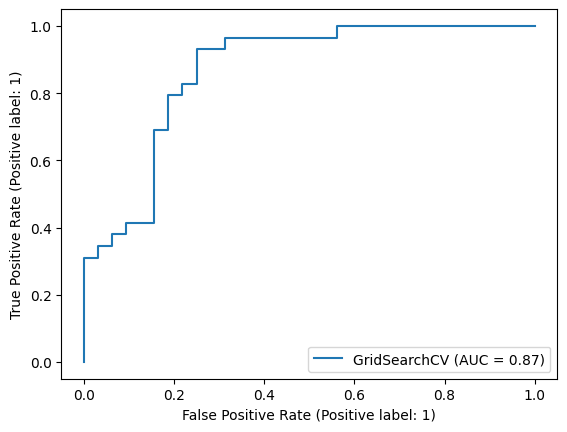

In [ ]:
RocCurveDisplay.from_estimator(estimator=gs_log_reg,
                               X=X_test,
                               y=y_test);

### Confusion matrix

In [ ]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[24  8]
 [ 5 24]]


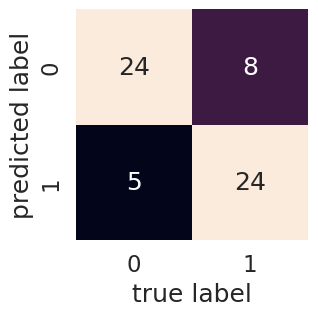

In [ ]:
# Create Seabon's heatmap()
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
  """
  Plot a confusion matrix using Seaborn's heatmap().
  """
  fig,ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot= True,
                   cbar= False)
  plt.xlabel("true label")
  plt.ylabel("predicted label")

plot_conf_mat(y_test, y_preds)

### Classification report

In [ ]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.75      0.83      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [ ]:
# Check the best hyperpameter again
gs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [ ]:
# Instantiate best model with the best hyperparameters
clf = LogisticRegression(C=1.623776739188721,
                         solver="liblinear")

In [ ]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")

cv_acc

array([0.81967213, 0.85245902, 0.85245902, 0.85      , 0.71666667])

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8182513661202186

In [ ]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5,
                                       scoring="precision"))
cv_precision

0.8122549019607843

In [ ]:
# Cross-validatated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5,
                                    scoring="recall"))
cv_recall

0.8727272727272727

In [ ]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5,
                                scoring="f1"))

cv_f1

0.8404818247075424

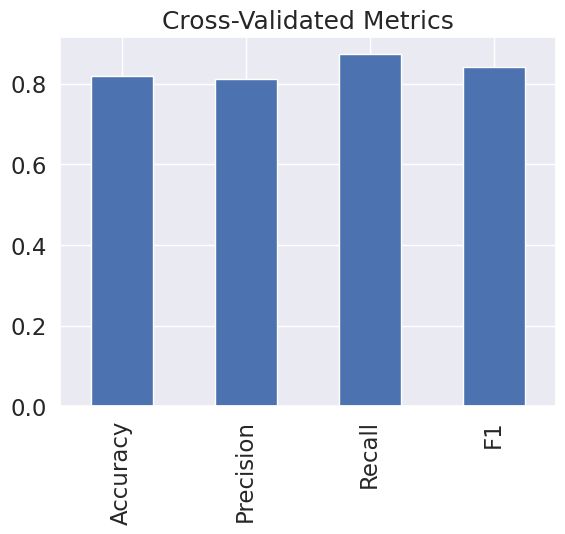

In [ ]:
# Visualizing cross-validated metric
cv_metric = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])
cv_metric.T.plot.bar(title="Cross-Validated Metrics", legend=False);

### Feature importance

In [ ]:
# fit an instance of LogisticRegression
clf.fit(X_train, y_train);

In [ ]:
# Check coef_
clf.coef_

array([[-0.01064478, -1.50424936,  1.10200454, -0.0060755 ,  0.00189618,
        -0.30190152,  0.52349519,  0.02137784, -0.97675522, -0.68842318,
         0.5414379 , -0.68985748, -0.80252913]])

In [ ]:
# MAtch features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': -0.010644779845700328,
 'sex': -1.5042493629601137,
 'cp': 1.1020045377957786,
 'trestbps': -0.006075504446318341,
 'chol': 0.001896175833457664,
 'fbs': -0.3019015202840569,
 'restecg': 0.523495191521915,
 'thalach': 0.021377838360841152,
 'exang': -0.9767552174051198,
 'oldpeak': -0.6884231795894126,
 'slope': 0.5414378982536749,
 'ca': -0.6898574766191485,
 'thal': -0.8025291305290698}

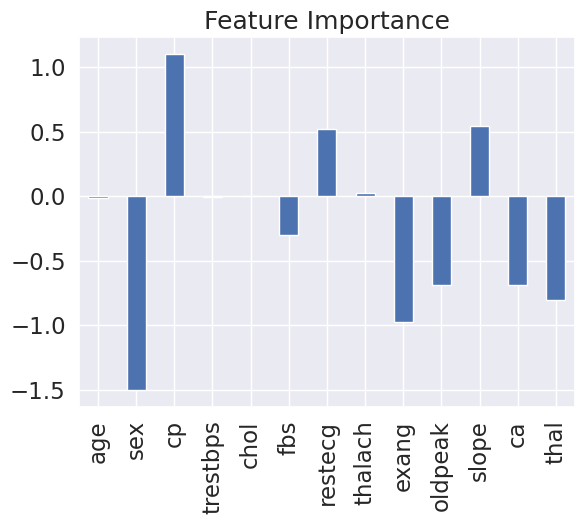

In [ ]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);